In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('MBAAdmission/train.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,NaN,5.0,Investment Management,Reject
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,NaN,Technology,Reject
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Reject


### P1-1
- 给出训练集数值型变量的count、mean、std、min、mid、max的统计特征
- 给出训练集非数值型变量的count、unique、value的表

In [2]:
print (df.describe())

       application_id          gpa         gmat     work_exp
count     6095.000000  5790.000000  5790.000000  5790.000000
mean      3104.612141     3.249636   650.818653     5.021934
std       1785.573306     0.151287    49.415865     1.034741
min          1.000000     2.650000   570.000000     1.000000
25%       1560.500000     3.150000   610.000000     4.000000
50%       3101.000000     3.250000   650.000000     5.000000
75%       4651.500000     3.350000   680.000000     6.000000
max       6194.000000     3.770000   780.000000     9.000000


In [3]:
cols_notnum = df[['gender','international','major','race','work_industry','admission']]

for col in cols_notnum:
    value_cnt = df[col].value_counts()
    print (value_cnt)
    print(f"Count: {df[col].count()}")
    print(f"Unique values: {df[col].nunique()}")
    print ()
    

gender
Male      3702
Female    2088
Name: count, dtype: int64
Count: 5790
Unique values: 2

international
False    4067
True     1723
Name: count, dtype: int64
Count: 5790
Unique values: 2

major
Humanities    2314
STEM          1758
Business      1718
Name: count, dtype: int64
Count: 5790
Unique values: 3

race
White       1358
Asian       1078
Black        857
Hispanic     553
Other        216
Name: count, dtype: int64
Count: 4062
Unique values: 5

work_industry
Consulting               1522
PE/VC                     849
Technology                667
Nonprofit/Gov             607
Investment Banking        536
Financial Services        419
Other                     396
Health Care               306
Investment Management     156
CPG                       109
Real Estate               107
Media/Entertainment        56
Retail                     31
Energy                     29
Name: count, dtype: int64
Count: 5790
Unique values: 14

admission
Reject      5161
Admit        867
Waitlist 

### P1-2
- 对缺失值进行合适的处理，要求至少使用两种方法完成缺失值的补充；

In [4]:
cols_num = ['application_id', 'gpa', 'gmat', 'work_exp']
cols_notnum = ['gender','international','major','race','work_industry','admission']


#数值用平均数， 非数值变量用众数：
def fill_method_1(df):  
    
    df_filled = df.copy()
    # numeric
    for col in cols_num:
        if df_filled[col].isnull().sum() > 0:
            mean = df[col].mean()
            df_filled[col] = df_filled[col].fillna(mean)
    
    for col in cols_notnum:
        if df[col].isnull().sum() > 0:
            mode_val = df_filled[col].mode()[0]
            df_filled[col] = df_filled[col].fillna(mode_val)
    
    return df_filled   

df_filled = fill_method_1(df)
print (type(df_filled))
print (df_filled.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


### P1-3
- 将分类属性进行OneHot编码，你需要对Gender进行标签编码，对international for MBA进行除所述两个编码外的任意编码，其余需要进行编码的数据采取one-hot编码；

In [5]:
from sklearn.preprocessing import LabelEncoder

col_without_two = ['major','race','work_industry']

def encode_data(df):
    df_encoded = df.copy()
    
    # label encoding
    if 'gender' in df.columns:
        le_gender = LabelEncoder() #创建编码器对象
        df_encoded['gender'] = le_gender.fit_transform(df['gender'].astype(str))
        
    #freq encoding
    if 'international' in df.columns:
        freq = df['international'].value_counts(normalize=True)
        df_encoded['international'] = df['international'].map(freq)
        
    if 'admission' in df.columns:
        le = LabelEncoder()
        df_encoded['admission'] = le.fit_transform(df['admission'])
    
    for col in col_without_two:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, prefix_sep='_',
                                dummy_na=False)
        # 添加到编码后的DataFrame
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        # 移除原始列
        df_encoded.drop(col, axis=1, inplace=True)
    
    return df_encoded

df_encoded = encode_data(df_filled)

col_encoded = []
for col in df_encoded.columns:
    col_encoded.append(col)
print (col_encoded)
df_encoded.head()

['application_id', 'gender', 'international', 'gpa', 'gmat', 'work_exp', 'admission', 'major_Business', 'major_Humanities', 'major_STEM', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other', 'race_White', 'work_industry_CPG', 'work_industry_Consulting', 'work_industry_Energy', 'work_industry_Financial Services', 'work_industry_Health Care', 'work_industry_Investment Banking', 'work_industry_Investment Management', 'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov', 'work_industry_Other', 'work_industry_PE/VC', 'work_industry_Real Estate', 'work_industry_Retail', 'work_industry_Technology']


,application_id,gender,international,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,0,0.717309,3.30,620.000000,3.000000,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,0.717309,3.28,650.818653,5.000000,1,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,3,0,0.282691,3.30,710.000000,5.000000,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,0.717309,3.47,690.000000,5.021934,1,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,1,0.717309,3.35,590.000000,5.000000,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### P1-4
- 对数值属性进行必要的操作，如归一化处理等；

In [6]:
from sklearn.preprocessing import StandardScaler

def standardize_numeric(df, cols_num):
    df_scaled = df.copy()
    scaler = StandardScaler()
    
    # 检查并处理缺失值
    for col in cols_num:
        if col in df.columns and df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df_scaled[col] = df[col].fillna(median_val)
            print(f"列 {col} 的缺失值用中位数 {median_val:.2f} 填充")
    
    # 标准化
    df_scaled[cols_num] = scaler.fit_transform(df_scaled[cols_num])
    
    #print("\n标准化后的数据统计 (均值为0，标准差为1):")
    #print(df_scaled[cols_num].describe())
    
    return df_scaled, scaler

df_scaled, _ = standardize_numeric(df_encoded, cols_num)
df_scaled.head()

,application_id,gender,international,gpa,gmat,work_exp,admission,major_Business,major_Humanities,major_STEM,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,-1.738303,0,0.717309,0.341592,-0.639930,-2.005029,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.737743,1,0.717309,0.205944,0.000000,-0.021751,1,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,-1.737182,0,0.282691,0.341592,1.228863,-0.021751,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.736622,1,0.717309,1.494603,0.813576,0.000000,1,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,-1.736062,1,0.717309,0.680713,-1.262861,-0.021751,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### P1-5
- 可视化分析数据，展示数据分布，发现规律；

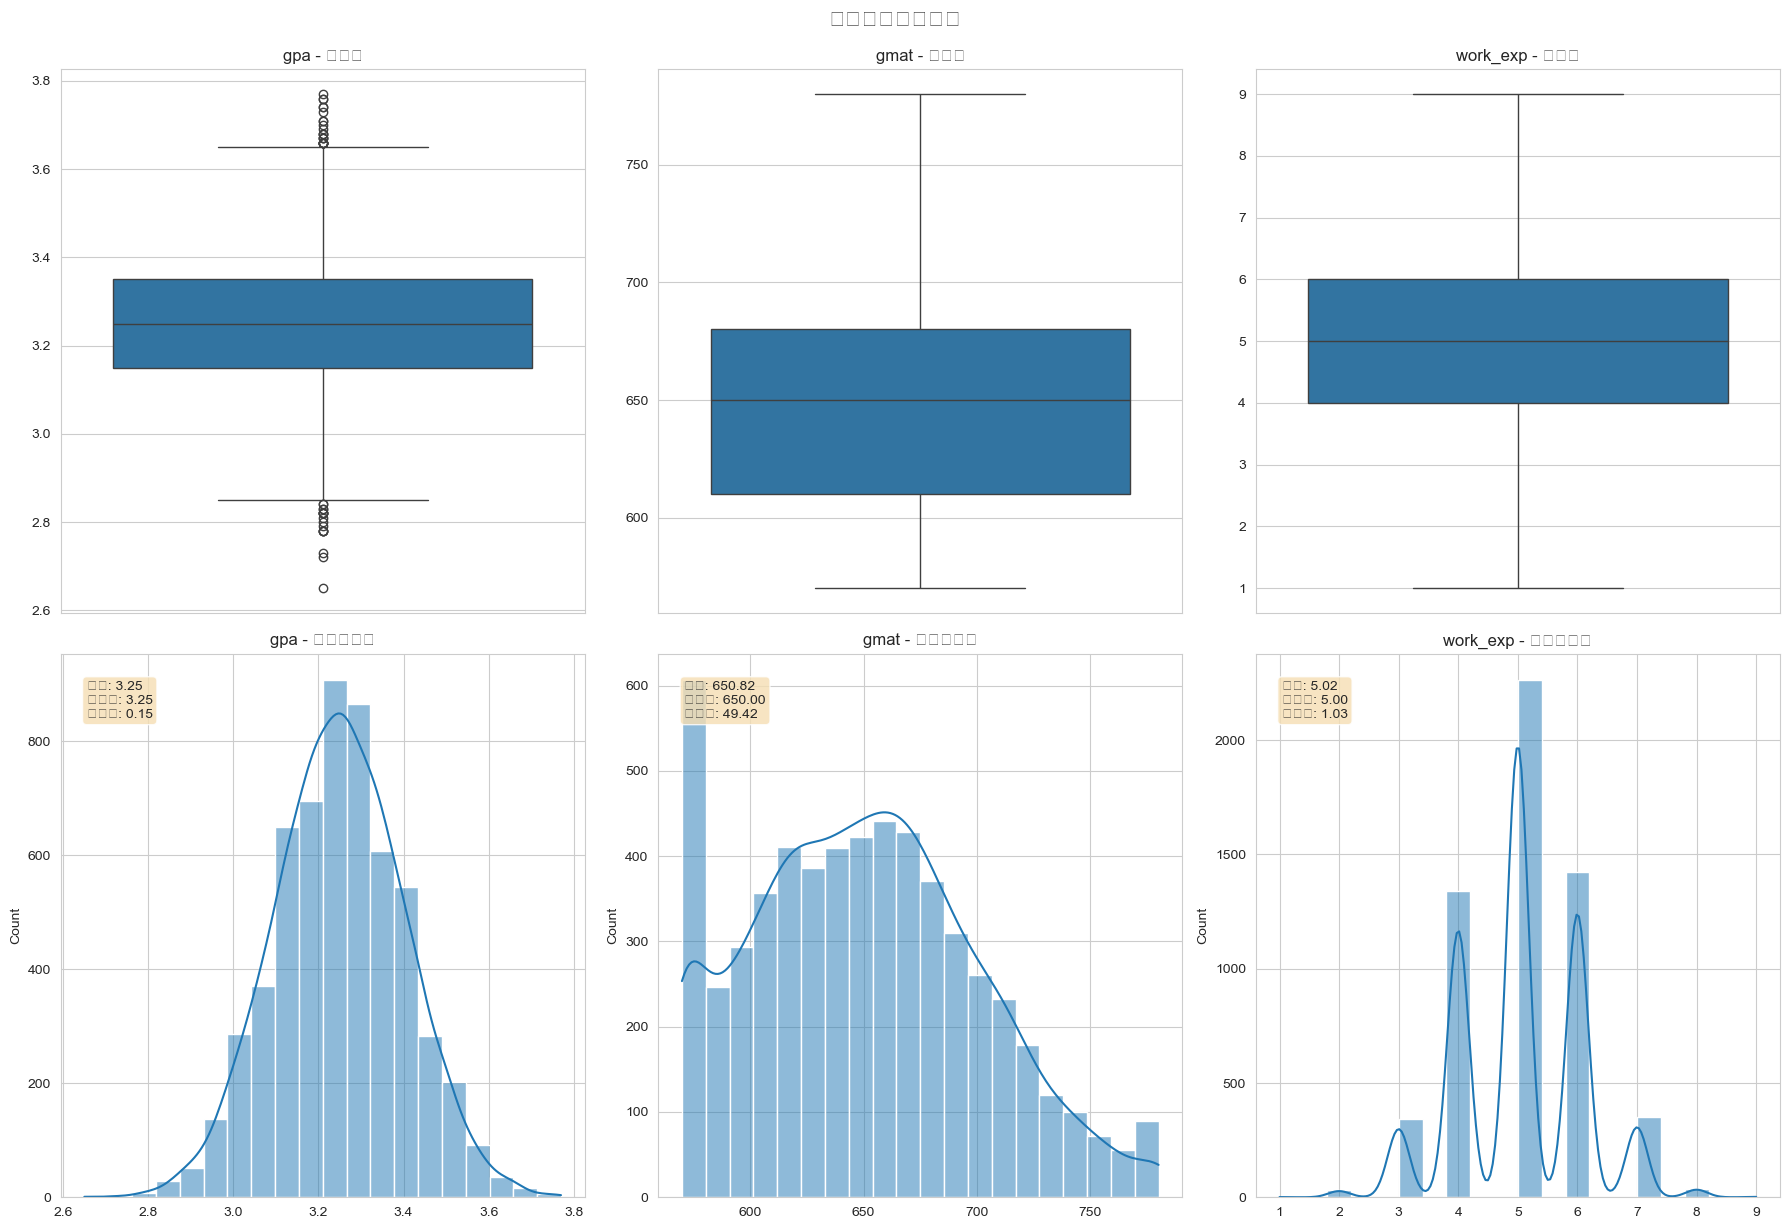

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. 数值变量的分布分析
def plot_numeric_distributions(df):
    """绘制数值变量的分布图"""
    numeric_cols = ['gpa', 'gmat', 'work_exp']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i >= len(axes):
            break
            
        # 箱线图
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'{col} - 箱线图')
        axes[i].set_ylabel('')
        
        # 直方图 + KDE
        if i + 3 < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i+3], bins=20)
            axes[i+3].set_title(f'{col} - 分布直方图')
            axes[i+3].set_xlabel('')
            
            # 添加统计信息
            stats_text = f'均值: {df[col].mean():.2f}\n中位数: {df[col].median():.2f}\n标准差: {df[col].std():.2f}'
            axes[i+3].text(0.05, 0.95, stats_text, transform=axes[i+3].transAxes, 
                          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # 移除多余的子图
    for j in range(i+4, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.suptitle('数值变量分布分析', fontsize=16, y=1.02)
    plt.show()

plot_numeric_distributions(df)

### P2-1
- 本题需要你分别用线性回归和逻辑回归对该数据集分类，请给出在训练集和测试集上的准确率。

In [8]:
! jupyter nbconvert --to script Problem1.ipynb



[NbConvertApp] Converting notebook Problem1.ipynb to script
[NbConvertApp] Writing 5174 bytes to Problem1.py
